In [1]:
#1.Importing dependencies and Load data
#1.1 Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.shape

(5110, 12)

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'] = df['bmi'].fillna(df.bmi.median())

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

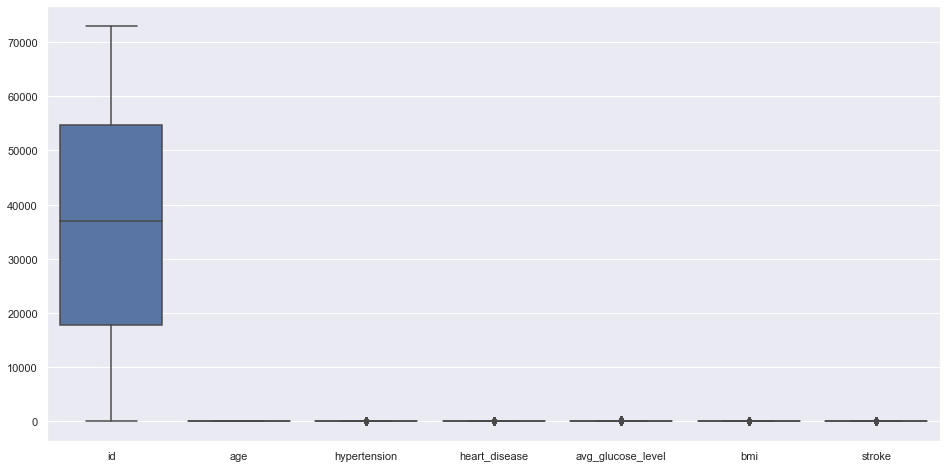

In [12]:
sns.set(rc={"figure.figsize":(16,8)})

sns.boxplot(data=df)

<AxesSubplot:>

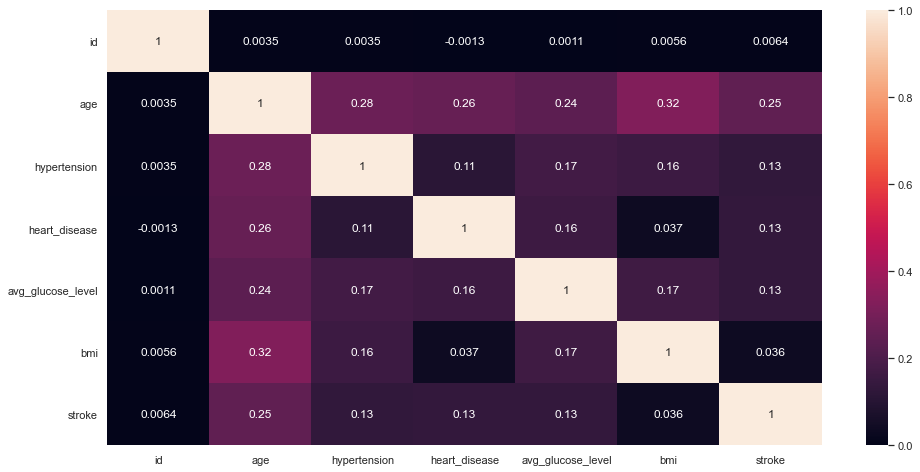

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [15]:
df1 = df.drop(['id','gender','ever_married','work_type'],axis=1)

In [16]:
df1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
1,61.0,0,0,Rural,202.21,28.1,never smoked,1
2,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,49.0,0,0,Urban,171.23,34.4,smokes,1
4,79.0,1,0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Urban,83.75,28.1,never smoked,0
5106,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


In [17]:
df1['Residence_type'] = df1['Residence_type'].map({'Urban':1,'Rural':0})

In [18]:
df1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,228.69,36.6,formerly smoked,1
1,61.0,0,0,0,202.21,28.1,never smoked,1
2,80.0,0,1,0,105.92,32.5,never smoked,1
3,49.0,0,0,1,171.23,34.4,smokes,1
4,79.0,1,0,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.1,never smoked,0
5106,81.0,0,0,1,125.20,40.0,never smoked,0
5107,35.0,0,0,0,82.99,30.6,never smoked,0
5108,51.0,0,0,0,166.29,25.6,formerly smoked,0


In [19]:
df1 = pd.get_dummies(df1)

In [20]:
df1 = df1.drop(['smoking_status_Unknown'],axis=1)

In [21]:
df1

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,1,0,0
1,61.0,0,0,0,202.21,28.1,1,0,1,0
2,80.0,0,1,0,105.92,32.5,1,0,1,0
3,49.0,0,0,1,171.23,34.4,1,0,0,1
4,79.0,1,0,0,174.12,24.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.1,0,0,1,0
5106,81.0,0,0,1,125.20,40.0,0,0,1,0
5107,35.0,0,0,0,82.99,30.6,0,0,1,0
5108,51.0,0,0,0,166.29,25.6,0,1,0,0


<AxesSubplot:>

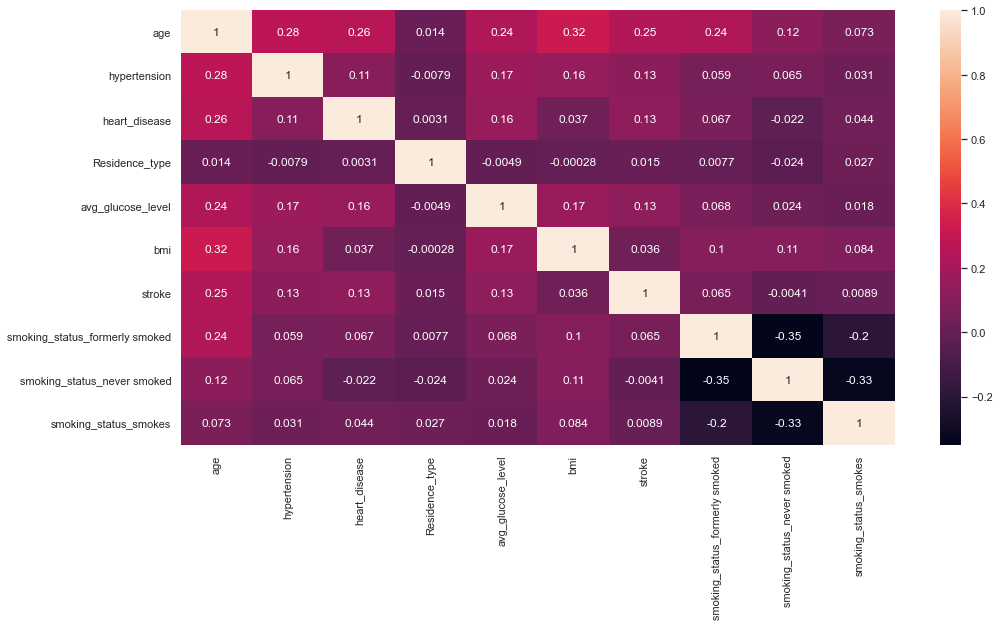

In [22]:
sns.heatmap(df1.corr(),annot=True)

In [23]:
X = df1.drop(['stroke','smoking_status_never smoked'],axis=1)

In [24]:
X

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status_formerly smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.6,1,0
1,61.0,0,0,0,202.21,28.1,0,0
2,80.0,0,1,0,105.92,32.5,0,0
3,49.0,0,0,1,171.23,34.4,0,1
4,79.0,1,0,0,174.12,24.0,0,0
...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,28.1,0,0
5106,81.0,0,0,1,125.20,40.0,0,0
5107,35.0,0,0,0,82.99,30.6,0,0
5108,51.0,0,0,0,166.29,25.6,1,0


In [25]:
y = df1['stroke'].values

In [26]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
rs = RandomOverSampler(sampling_strategy=0.8)

In [40]:
X1,y1 = rs.fit_resample(X,y)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=2)

In [42]:
print('X_train',np.shape(X_train))
print('X_test',np.shape(X_test))
print('y_train',np.shape(y_train))
print('y_test',np.shape(y_test))

X_train (6124, 8)
X_test (2625, 8)
y_train (6124,)
y_test (2625,)


In [43]:
obj = StandardScaler()

In [44]:
X_train = obj.fit_transform(X_train)

In [45]:
X_test = obj.fit_transform(X_test)

In [46]:
lr = LogisticRegression()

In [47]:
model = lr.fit(X_train,y_train)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [50]:
cm = confusion_matrix(y_test,y_pred)

In [51]:
cm

array([[1126,  345],
       [ 260,  894]], dtype=int64)

In [54]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print('TP',TP)
print('FP',FP)
print('FN',FN)
print('TN',TN)


TP 1126
FP 260
FN 345
TN 894


In [57]:
P = TP/(TP+FP)
R = TP/(TP+FN)

print('Accuracy',(TP+TN)/(TP+FP+FN+TN))
print("Precision",P)
print("Recall",R)
print("F1-Score",2*((P*R)/(P+R)))

Accuracy 0.7695238095238095
Precision 0.8124098124098124
Recall 0.7654656696125085
F1-Score 0.7882394119705985


In [59]:
ac = accuracy_score(y_test,y_pred)
ac

0.7695238095238095

In [60]:
pc = precision_score(y_test,y_pred)
pc

0.7215496368038741

In [61]:
re = recall_score(y_test,y_pred)
re

0.7746967071057193

In [62]:
f1 = 2*((pc*re)/(pc+re))
f1

0.7471792728792311

In [63]:
X_test

array([[ 0.98740065, -0.44137411, -0.34967767, ..., -0.14780069,
         1.91810959, -0.4462933 ],
       [ 0.20592882, -0.44137411, -0.34967767, ...,  0.43060509,
        -0.52134665, -0.4462933 ],
       [ 0.68349494, -0.44137411,  2.85977651, ..., -0.11813885,
        -0.52134665,  2.24067896],
       ...,
       [-1.40042992, -0.44137411, -0.34967767, ..., -0.56306637,
         1.91810959, -0.4462933 ],
       [ 1.24789125, -0.44137411, -0.34967767, ..., -0.65205188,
        -0.52134665,  2.24067896],
       [ 1.16106105, -0.44137411,  2.85977651, ..., -1.0969794 ,
         1.91810959, -0.4462933 ]])

In [74]:
X_test[1]

array([ 0.20592882, -0.44137411, -0.34967767, -1.05523768, -0.43792997,
        0.43060509, -0.52134665, -0.4462933 ])

In [75]:
result = model.predict([[0.20592882, -0.44137411, -0.34967767, -1.05523768, -0.43792997,
        0.43060509, -0.52134665, -0.4462933]])
if result[0]==1:
    print("You have been strocked")
else:
    print("You have not been strocked")

You have not been strocked


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1471
           1       0.72      0.77      0.75      1154

    accuracy                           0.77      2625
   macro avg       0.77      0.77      0.77      2625
weighted avg       0.77      0.77      0.77      2625

